In [516]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [517]:
from sklearn import datasets
iris = datasets.load_iris()
X = pd.DataFrame(iris["data"][:, 3:],columns=["petal width"]) # petal width
y = pd.DataFrame((iris["target"] == 2).astype(int),columns=["Target"]) # 1 if Iris-Virginica, else 0
##astype(int) boolean değerleri int tipine dönüştürür

In [518]:
iris = pd.concat([X, y], axis=1)

In [519]:
iris.head(10)

,petal width,Target
0,0.2,0
1,0.2,0
2,0.2,0
3,0.2,0
4,0.2,0
5,0.4,0
6,0.3,0
7,0.2,0
8,0.2,0
9,0.1,0


In [520]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   petal width  150 non-null    float64
 1   Target       150 non-null    int32  
dtypes: float64(1), int32(1)
memory usage: 1.9 KB


In [521]:
accuracies = []

In [522]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    log_reg = LogisticRegression()
    log_reg.fit(X_train,y_train)
    
    y_pred = log_reg.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


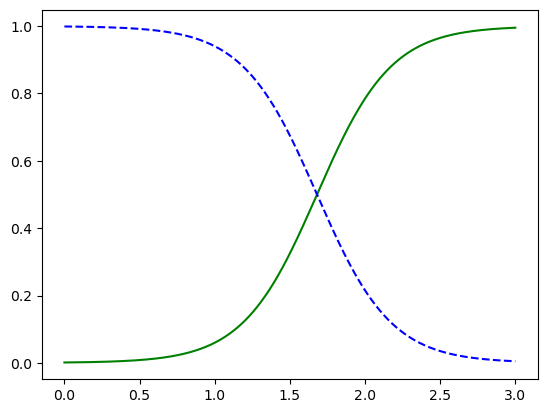

In [523]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
# + more Matplotlib code to make the image look pretty
## Blue is virginica, Green is not virginica

In [524]:
mean_accuracy = sum(accuracies) / len(accuracies)

In [525]:
print("K-Fold Values:", accuracies)
print("Mean Accuracy:", mean_accuracy)

K-Fold Values: [1.0, 1.0, 1.0, 0.9333333333333333, 1.0, 0.8666666666666667, 0.8666666666666667, 1.0, 0.9333333333333333, 1.0]
Mean Accuracy: 0.9600000000000002
